In [ ]:
%matplotlib inline
from fastai.basics import *
from fastai.tabular import*

In [ ]:
path=Path("/content/data")
path

PosixPath('/content/data')

In [ ]:
data=pd.read_csv(path/"Discovering the Stability Formula.csv", header=None, index_col=False)
data.head()

,0,1
0,1,1
1,1,2
2,2,3
3,2,4
4,3,6


In [ ]:
x=[]

In [ ]:
y=[]

In [ ]:
prev_x=0

In [ ]:
for i in range(len(data)-1, 0, -1):
  x_val = data[0][i]
  if (prev_x!=x_val):
    prev_x = x_val
    y_val = data[1][i]
    if (x_val==57 or x_val==58):
      print(y_val)
    x.insert(0,[float(x_val**2), float(x_val), float(1)])
    y.insert(0,y_val-x_val)

142
139


In [ ]:
x[:5], y[:5]

([[1.0, 1.0, 1.0],
  [4.0, 2.0, 1.0],
  [9.0, 3.0, 1.0],
  [16.0, 4.0, 1.0],
  [25.0, 5.0, 1.0]],
 [1, 2, 4, 5, 7])

In [ ]:
x=tensor(x)
y=tensor(y)

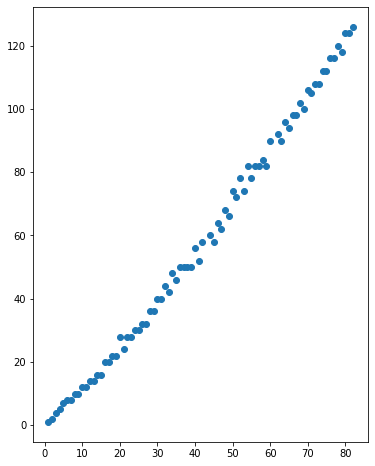

In [ ]:
plt.figure(figsize=(6,8))
plt.scatter(x[:,1],y)

In [ ]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [ ]:
a = tensor(0.0059, 1.0321, 0.9998)

In [ ]:
y_hat = x@a
mse(y_hat, y)

tensor(6.9089)

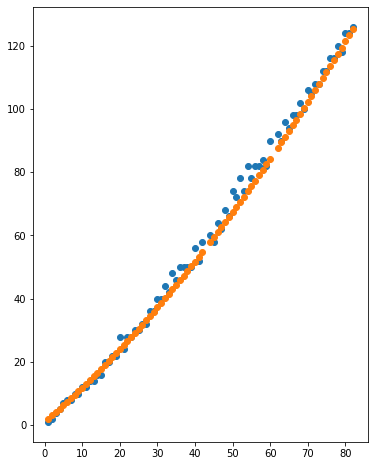

In [ ]:
plt.figure(figsize=(6,8))
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],y_hat);

In [ ]:
a = nn.Parameter(a); a

Parameter containing:
tensor([0.0059, 1.0321, 0.9998], requires_grad=True)

In [ ]:
def update():
    y_hat = x@a
    loss = mse(y_hat, y)
    if t % 1000000 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [ ]:
lr = 2e-7
for t in range(1000000): update()

tensor(3.6517, grad_fn=<MeanBackward0>)


KeyboardInterrupt: ignored

In [ ]:
a

Parameter containing:
tensor([nan, nan, nan], requires_grad=True)

In [ ]:
fin_a = tensor([0.0052, 1.1165, 0.8210])

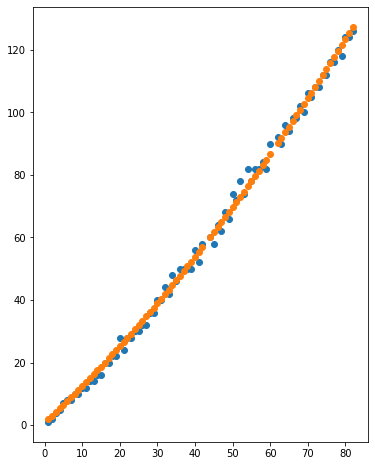

In [ ]:
plt.figure(figsize=(6,8))
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],x@fin_a)